In [1]:
import matplotlib as mpl
mpl.use('Agg')

from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

import matplotlib.pyplot as plt

import massmapper as mm
import numpy as np
import random

%matplotlib inline

In [2]:
masswidth=0.5
n=None
catalog_kind='subhalo'
cat12=mm.Mergerdata(12.,masswidth,catalog_kind=catalog_kind,n=n)
cat13=mm.Mergerdata(13.,masswidth,catalog_kind=catalog_kind,n=n)
cat11=mm.Mergerdata(11.,masswidth,catalog_kind=catalog_kind,n=n)

# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree

100% |########################################################################|


# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree

100% |########################################################################|


# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree

100% |########################################################################|


In [3]:
zarray=cat12.zarray

massmap11,avgratios11=cat11.massmap,cat11.avgratios
massmap12,avgratios12=cat12.massmap,cat12.avgratios
massmap13,avgratios13=cat13.massmap,cat13.avgratios

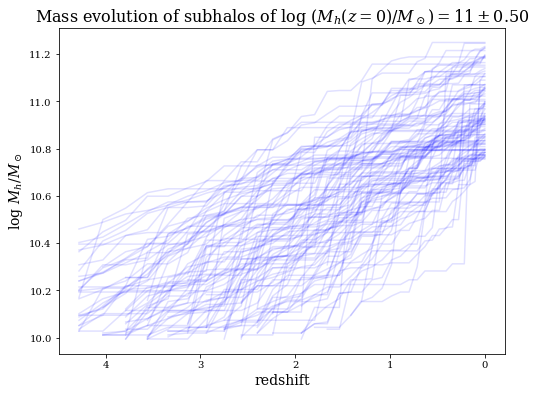

901648 subhalos
showing a random sample of 100


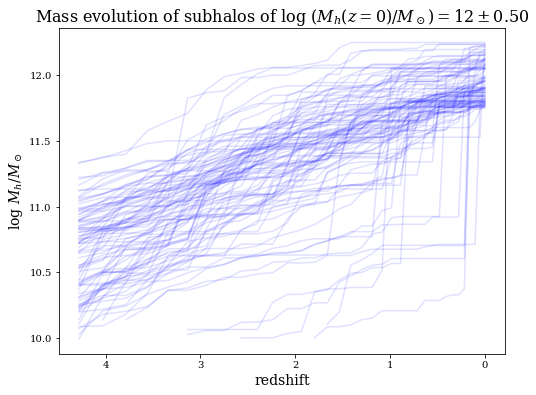

121120 subhalos
showing a random sample of 100


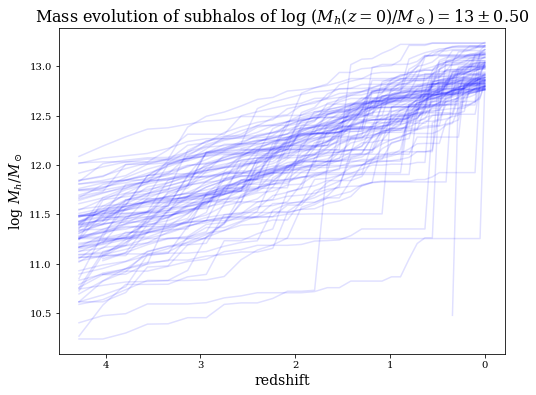

13280 subhalos
showing a random sample of 100


In [4]:
def plotev(cat):
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1)
    for halo, item in enumerate(random.sample(cat.massmap,100)):
        #x=np.arange(35)
        mask=cat.massmap[halo]>0
        ax.plot(zarray[mask],cat.massmap[halo][mask],color='blue',
                alpha=0.12)
    ax.set_xlabel('redshift',fontsize=14)
    ax.set_ylabel('log $M_h/M_\odot$',fontsize=14)
    #ax.set_title('this is {}'.format('hal'))
    ax.set_title('Mass evolution of {0}s of log $(M_h(z=0)/M_\odot)'
                 '={1:0.0f}\pm {2:0.2f}$'.
                 format(catalog_kind,cat.mhal0,masswidth),
                 fontsize=16)
    ax.invert_xaxis()
    plt.show()

    print('{0:0.0f} {1}s'
         '\nshowing a random sample of 100').format(cat.massmap[:,0].size,catalog_kind)
    
plotev(cat11)
plotev(cat12)
plotev(cat13)

In [5]:
'''
f.close()
import h5py
f=h5py.File('/data1/staudt/mergers/allmassmap.hdf5','w')
grp=f.create_group('data')
for snapshot in allmassbranches.snapshotindex:
    grp.create_dataset(str(snapshot),data=allmassbranches.massmap[snapshot])
f.close()
'''

"\nf.close()\nimport h5py\nf=h5py.File('/data1/staudt/mergers/allmassmap.hdf5','w')\ngrp=f.create_group('data')\nfor snapshot in allmassbranches.snapshotindex:\n    grp.create_dataset(str(snapshot),data=allmassbranches.massmap[snapshot])\nf.close()\n"

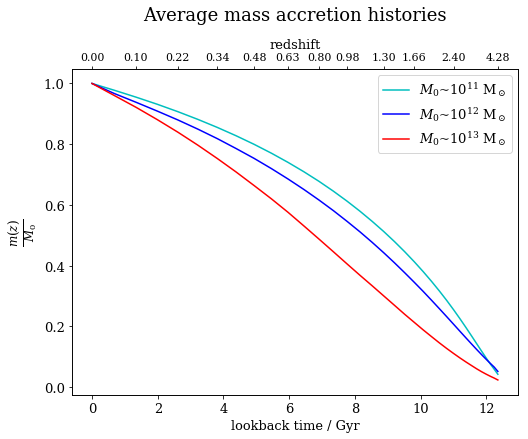

In [74]:
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(1,1,1)
ax2=ax1.twiny()

ax1.plot(cat11.lbt,avgratios11,'c-',label='$M_0$~$10^{11}$ M$_\odot$')
ax1.plot(cat12.lbt,avgratios12,'b-',label='$M_0$~$10^{12}$ M$_\odot$')
ax1.plot(cat13.lbt,avgratios13,'r-',label='$M_0$~$10^{13}$ M$_\odot$')
ax1.set_ylabel('$\\frac{m(z)}{{M_0}}$',fontsize=17)
ax1.set_xlabel('lookback time / Gyr',fontsize=13)
ax1.set_title('Average mass accretion histories',fontsize=18,y=1.13)
ax1.tick_params(axis='both',labelsize=13)
ax1.legend(fontsize=13)

indices=[2*n for n in range(12/2)]+[12,14,17,20,25,34]
locs=cat12.lbt[indices]
labs=zarray[indices]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(locs)
#ax2.set_xticklabels(labs)
ax2.set_xticklabels(['{:,.2f}'.format(lab) for lab in labs],fontsize=11)
ax2.set_xlabel('redshift',fontsize=13)
#ax2.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()